In [1]:
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively,\
    plot_curves
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import fbeta_score, make_scorer

In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


In [14]:
# no undersampling
# Baseline model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)

In [15]:
print(train_res, test_res)

0.9457 0.8684


In [5]:
# no undersampling
# Baseline model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
print(train_res, test_res)

0.9668 0.8983


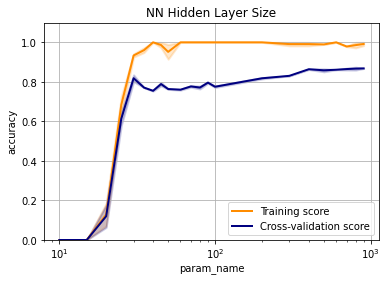

In [9]:
# optimize hidden_layer_sizes

param_range = list(range(10, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 1000, 100))
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test, plt = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='hidden_layer_sizes', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='NN Hidden Layer Size')


In [10]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

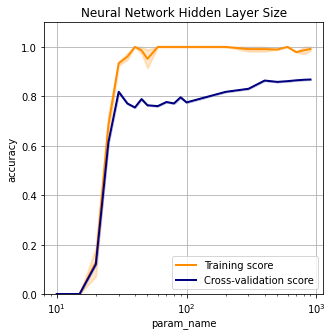

In [13]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Neural Network Hidden Layer Size',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

In [14]:
labeled_test

array([[1.000e+01, 0.000e+00],
       [1.500e+01, 0.000e+00],
       [2.000e+01, 1.202e-01],
       [2.500e+01, 6.132e-01],
       [3.000e+01, 8.183e-01],
       [3.500e+01, 7.710e-01],
       [4.000e+01, 7.548e-01],
       [4.500e+01, 7.889e-01],
       [5.000e+01, 7.637e-01],
       [6.000e+01, 7.604e-01],
       [7.000e+01, 7.770e-01],
       [8.000e+01, 7.713e-01],
       [9.000e+01, 7.961e-01],
       [1.000e+02, 7.754e-01],
       [2.000e+02, 8.181e-01],
       [3.000e+02, 8.305e-01],
       [4.000e+02, 8.639e-01],
       [5.000e+02, 8.584e-01],
       [6.000e+02, 8.614e-01],
       [7.000e+02, 8.648e-01],
       [8.000e+02, 8.670e-01],
       [9.000e+02, 8.681e-01]])

In [ ]:
# no undersampling
# model performance with 400 nodes in hidden layer 1

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=400, random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)

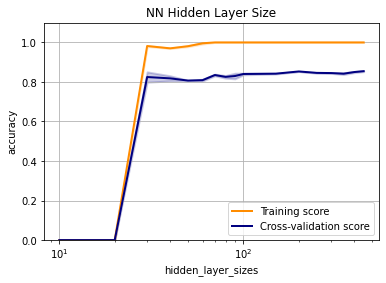

In [3]:
# optimize hidden_layer_sizes

param_range = [(400, i) for i in list(range(10, 50, 10)) + list(range(50, 100, 10)) + list(range(100, 500, 50))]

cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='hidden_layer_sizes', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='NN Hidden Layer Size', plot_param_index=1)


In [4]:
labeled_test

array([[ 10.    ,   0.    ],
       [ 20.    ,   0.    ],
       [ 30.    ,   0.8249],
       [ 40.    ,   0.8182],
       [ 50.    ,   0.807 ],
       [ 60.    ,   0.8091],
       [ 70.    ,   0.8351],
       [ 80.    ,   0.8258],
       [ 90.    ,   0.83  ],
       [100.    ,   0.8403],
       [150.    ,   0.8419],
       [200.    ,   0.8531],
       [250.    ,   0.8459],
       [300.    ,   0.845 ],
       [350.    ,   0.8419],
       [400.    ,   0.8501],
       [450.    ,   0.8546]])

In [5]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [11]:
# hidden layer sizes = (400,)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(400,), random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)

In [12]:
print(train_res, test_res)

0.9859 0.8897


In [11]:
_param_range =[p[1] for p in param_range]

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

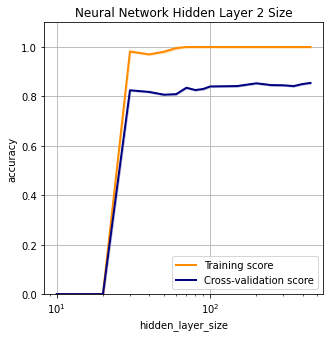

In [14]:
plot_curves(_param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Neural Network Hidden Layer 2 Size',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='hidden_layer_size')

In [4]:
# hidden layer sizes = (400, 200)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(400, 200), random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)

In [9]:
print(train_res, test_res)

0.9594 0.9123


# Activation Function

AxisError: axis 1 is out of bounds for array of dimension 1

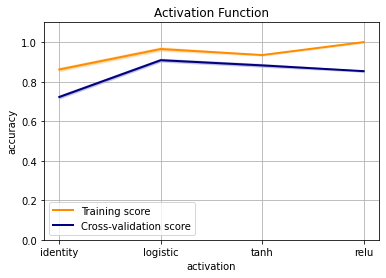

In [18]:
classifier = MLPClassifier(solver='adam', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400, 200))
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Activation Function'# optimize hidden_layer_sizes

param_range = ['identity', 'logistic', 'tanh', 'relu']

cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(400, 200), alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='activation', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title=title, is_log_axis=False)


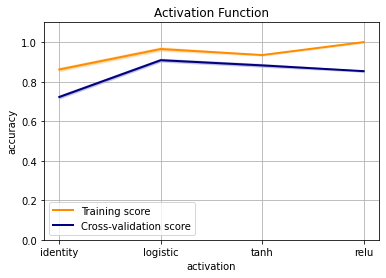

In [3]:
classifier = MLPClassifier(solver='adam', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400, 200))
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Activation Function'# optimize hidden_layer_sizes

param_range = ['identity', 'logistic', 'tanh', 'relu']

cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(400, 200), alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='activation', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title=title, is_log_axis=False)


In [5]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

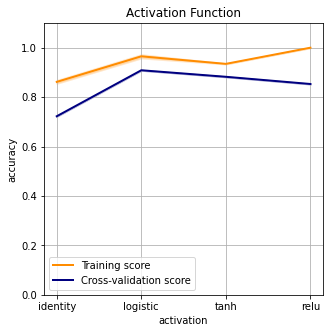

In [7]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Activation Function',
            scoring='accuracy', is_log_axis=False, 
            figsize=(5,5), param_name='activation')

In [18]:
# hidden layer sizes = (400, 200)
# Activation = 'logistic' or sigmoid

classifier = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, 
                           hidden_layer_sizes=(400, 200), random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)

In [19]:
print(train_res, test_res)

0.9594 0.9123


In [17]:
# hidden layer sizes = (400, 200)
# Activation = 'logistic' or sigmoid

classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, 
                           hidden_layer_sizes=(400, 200), random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)
print(train_res, test_res)

1.0 0.8775


[[1.000e-04 1.000e+00]
 [1.000e-04 1.000e+00]
 [2.000e-04 1.000e+00]
 [3.000e-04 9.938e-01]
 [4.000e-04 1.000e+00]
 [5.000e-04 1.000e+00]
 [6.000e-04 1.000e+00]
 [7.000e-04 1.000e+00]
 [8.000e-04 9.760e-01]
 [9.000e-04 9.824e-01]
 [1.000e-03 9.651e-01]
 [3.000e-03 8.974e-01]
 [6.000e-03 8.309e-01]
 [1.000e-02 7.770e-01]
 [3.000e-02 0.000e+00]
 [6.000e-02 0.000e+00]
 [1.000e-01 0.000e+00]]


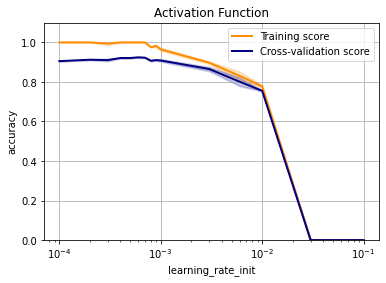

In [23]:
# initial learning rate
title = 'Activation Function'# optimize hidden_layer_sizes

param_range = [1e-4, 1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3, 3e-3, 6e-3, 1e-2, 3e-2, 6e-2, 1e-1]

cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(400, 200), alpha=1e-4, random_state=0,
                           activation='logistic',
                           max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='learning_rate_init', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title=title, is_log_axis=True)
print(labeled_train)

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

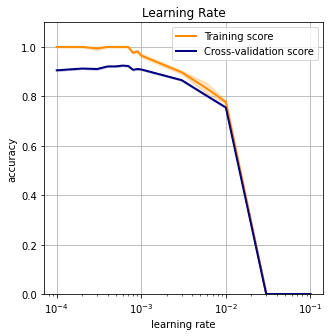

In [27]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Learning Rate',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='learning rate')

In [29]:
labeled_test

array([[1.000e-04, 9.053e-01],
       [1.000e-04, 9.053e-01],
       [2.000e-04, 9.125e-01],
       [3.000e-04, 9.106e-01],
       [4.000e-04, 9.210e-01],
       [5.000e-04, 9.212e-01],
       [6.000e-04, 9.244e-01],
       [7.000e-04, 9.228e-01],
       [8.000e-04, 9.072e-01],
       [9.000e-04, 9.105e-01],
       [1.000e-03, 9.087e-01],
       [3.000e-03, 8.655e-01],
       [6.000e-03, 8.013e-01],
       [1.000e-02, 7.549e-01],
       [3.000e-02, 0.000e+00],
       [6.000e-02, 0.000e+00],
       [1.000e-01, 0.000e+00]])

In [30]:
# hidden layer sizes = (400, 200)
# Activation = 'logistic' or sigmoid

classifier = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, 
                           hidden_layer_sizes=(400, 200), random_state=0, max_iter=1000, learning_rate_init=6e-4)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)
print(train_res, test_res)

0.9799 0.925


In [5]:
# hidden layer sizes = (800, 10)
# Activation = 'logistic' or sigmoid

classifier = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, learning_rate='adaptive',
                           hidden_layer_sizes=(800, 10), random_state=0, max_iter=1000, learning_rate_init=6e-4)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)
print(train_res, test_res)

0.9826 0.8967


# Learning Curve

In [3]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:5000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:5000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:5000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(5000, 784) (10000, 784) (5000, 1) (10000, 1) (5000, 10) (10000, 10)


iteration 1
{'train_sizes': array([ 175,  350,  525,  700,  875, 1050, 1225, 1400, 1575, 1750]), 'train_scores_mean': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'train_scores_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_scores_mean': array([0.70657143, 0.792     , 0.82571429, 0.83828571, 0.85714286,
       0.86171429, 0.874     , 0.88      , 0.87685714, 0.88085714]), 'test_scores_std': array([0.01114286, 0.00514286, 0.00342857, 0.00342857, 0.00057143,
       0.00342857, 0.00085714, 0.00171429, 0.00314286, 0.00028571]), 'fit_times_mean': array([ 38.84134102,  52.6106019 ,  59.33223438,  75.61018658,
        88.0436213 , 107.26491296, 116.63050318, 116.06380451,
       130.0953474 , 146.89424336]), 'fit_times_std': array([ 7.00023961,  3.55632567,  2.30097651,  2.0599556 ,  2.84377909,
        5.79280889, 10.84725428,  7.47044551,  9.10971069,  5.00321949]), 'fit_times_train_size_ratio': 0.09676745938635492, 'fit_times_test_score_ratio': 110.96996827606999, 'score_t

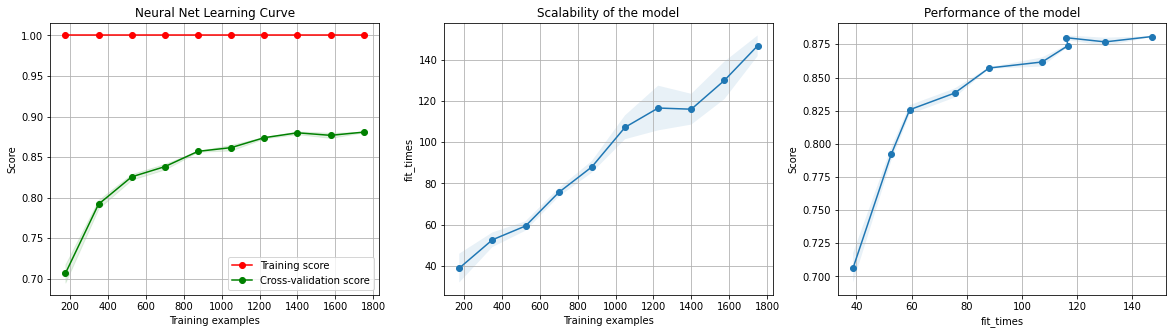

In [4]:
classifier = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400, 200), learning_rate_init=6e-4)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Neural Net Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)
print(results)



iteration 1
<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>


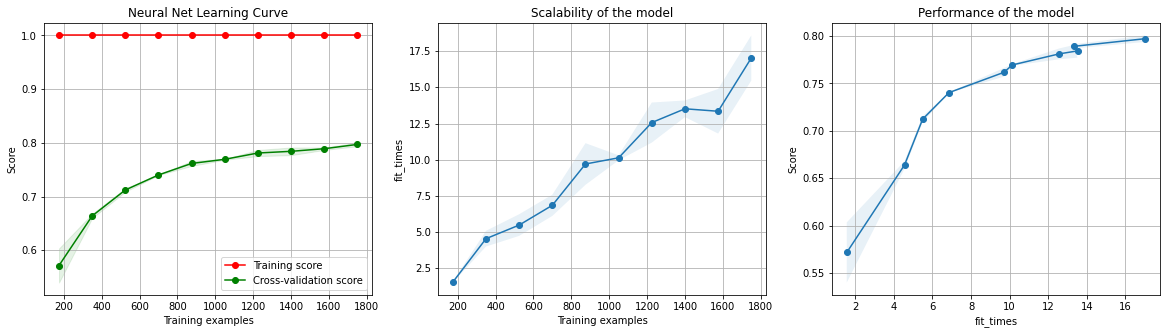

In [35]:
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400, 200))
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Neural Net Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)
print(results)



iteration 1
lol


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 452, in _validate_hyperparameters
    raise ValueError("learning

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

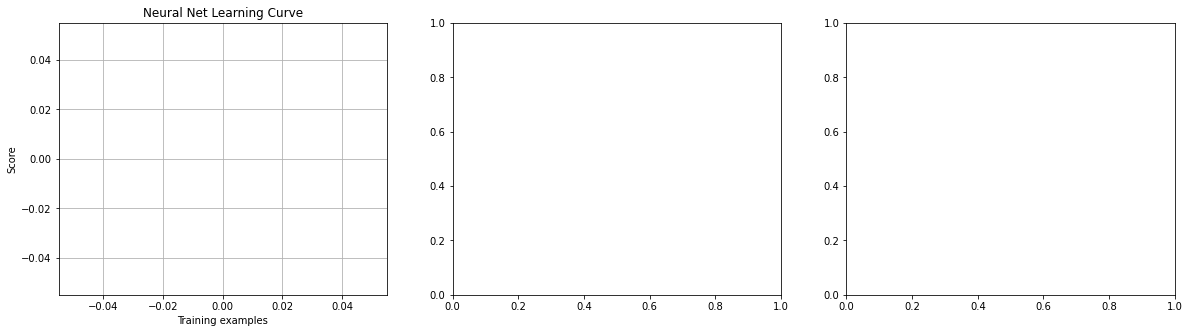

In [36]:
classifier = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400,), learning_rate=6e-4)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Neural Net Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)
print(results)

